# A Ruína do Apostador
### Por: Rafael Brusiquesi Martins
Neste notebook será feita uma simulação sobre a convergência do capital de aposta aplicado sobre uma roleta clássica. Aplicando uma análise estocástica sobre os eventos resultantes de cada lançamento, obtém-se um comportamento de caminhada aleatória que pode fornecer uma tendência estatística esperada em relação ao comportamento do apostador para grandes números de apostas, o que se aproxima à tendência ao infinito do número de eventos, validando assim a abordagem analítica desenvolvida pela aplicação dos teoremas fundamentais da estatística sobre o caso.

### Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

### RouletteFull
Definindo uma classe para simular o comportamento de uma roleta de cassino, onde é fornecida a probabilidade de aposta pelo jogador, e o multiplicador dos ganhos para cada aposta vencida.

In [2]:
class RouletteFull:
    def __init__(self, p_bet_red=0.5, multiplier=2):
        self.p_bet_red = p_bet_red
        self.multiplier = multiplier
        self.roulette_colors = ['r']*18 + ['b']*18 + ['0']*2
    
    def red_bet(self):
        return np.random.random() < self.p_bet_red

    def roll(self, bet, print_steps=False):
        color_result = np.random.choice(self.roulette_colors)
        if print_steps: print('color result:', color_result)
        
        win = False
        if self.red_bet():
            if print_steps: print('red bet')
            if color_result == 'r':
                win = True
                if print_steps: print('win')
            
            else:
                if print_steps: print('loss')

        else:
            if print_steps: print('black bet')
            if color_result == 'b':
                win = True
                if print_steps: print('win')

            else:
                if print_steps: print('loss')
        
        return win * self.multiplier * bet

roulette = RouletteFull()
result = roulette.roll(1, print_steps=True)

color result: b
black bet
win


### RouletteFast
Nessa seção é definida uma nova classe de simulação para a roleta, mas partindo do pressuposto de que as probabilidades de obter um resultado preto e um vermelho são iguais, dessa maneira o problema pode ser simplificado para apenas a avaliação da probabilidade de vitória do jogador sendo igual à 18/38. Dessa forma, o computador executará menos operações, possibilitando uma execução mais rápida do código.

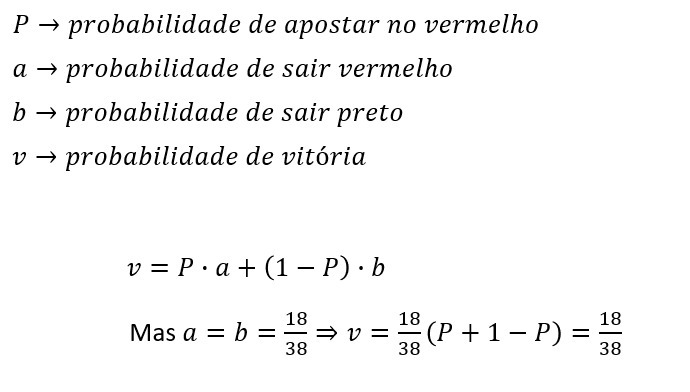

In [3]:
class RouletteFast:
    def __init__(self, p_win=18/38, multiplier=2):
        self.p_win = p_win
        self.multiplier = multiplier
    
    def roll(self, bet):
        win = np.random.random() < self.p_win
        return win * self.multiplier * bet

### run_betting
Definindo uma função que simula uma bateria de apostas inteira, onde o jogador só para se atingir o alvo, ou quebrar a banca.

In [4]:
def run_betting(roulette, total_balance, base_bet, target_profit):
    target_balance = total_balance + target_profit
    
    while 0 < total_balance < target_balance:
        total_balance -= base_bet
        total_balance += roulette.roll(bet=base_bet)
    
    success = total_balance != 0
    return success

### Simulação
Simulação de uma bateria de rodadas para estimar a probabilidade de sucesso do apostador ao definir um determinado valor de alvo e montante inicial, e comparação do resultado com o valor teórico fornecido pela equação do texto de referência.

Pode-se inferir que os resultados obtidos pelas classes RouletteFull e RouletteFast são equivalentes, entretanto, a classe RouletteFast é mais eficiente em termos de complexidade computacional.

Para selecionar a classe desejada, basta comentar e descomentar as duas primeiras conforme preferência.

In [5]:
# roulette = RouletteFull(p_bet_red=0.5, multiplier=2)
roulette = RouletteFast(p_win=18/38, multiplier=2)

total_balance = 100
base_bet = 1
target_multiplier = 0.1
target_profit = int(total_balance * target_multiplier)

total_runs = 1000
successes = 0

for run in range(total_runs):
    result = run_betting(roulette, total_balance, base_bet, target_profit)
    successes += result

print('simulated probability of success:', successes / total_runs)

p = 18/38
n = total_balance
w = total_balance + target_profit
print('theoretical probability of success:', (((1-p)/p)**n - 1)/(((1-p)/p)**w - 1))

simulated probability of success: 0.35
theoretical probability of success: 0.3486724079030196


### Análise analítica da probabilidade de sucesso
Uma expressão analítica que aproxima a probabilidade de sucesso para uma diferença entre o alvo e o montante suficientemente grande pode ser descrita da seguinte maneira:

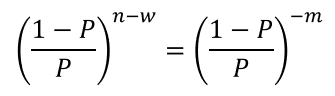

Onde -m representa a diferença entre o montante e o alvo, dessa forma, pode-se plotar o gráfico a seguir e concluir que para valores grandes de m, a probabilidade de sucesso decai exponencialmente.

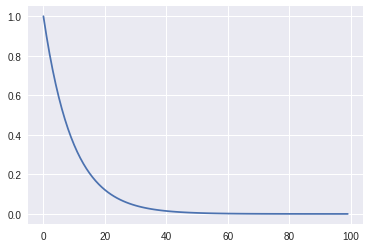

In [6]:
plot = plt.plot([((1-p)/p)**-m for m in range(100)])

### Referência
MIT 6042J, 2010, Random Walks, Cap 20.